# 0. Import libraries and set parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 200 # make your graphs bigger

# 1. Get data with a previosly made function

In [10]:
from preparation import prepare_data

PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)
df.head(5)

,video_title,channel_name,time
0,Висота / Ніхто Крім Нас,Тартак - Topic,2022-07-25 17:32:08.239000+03:00
1,Кіркоров пішов проти України. Баста зрадив сво...,STERNENKO,2022-07-25 17:03:14.805000+03:00
2,The Man Who Would Be King - FULL Audio Book - ...,Greatest AudioBooks,2022-07-25 15:22:33.768000+03:00
3,Ernest Hemingway The Sun Also Rises Audiobook,바카라 일등공신,2022-07-25 15:22:26.638000+03:00
4,Linux users installing a web browser,John Gaye,2022-07-25 12:47:28.219000+03:00


# 2. Explore

### 2.1 Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

Eurovision Song Contest              196
STERNENKO                            190
Adam Something                        81
Beau of the Fifth Column              68
Sky News                              66
                                    ... 
Quỳnh Vũ Vlogs                         1
Chalmers University of Technology      1
The Skills Network                     1
WAR in UKRAINE                         1
АрміяInform                            1
Name: channel_name, Length: 1180, dtype: Int64

### 2.2 Plot n most watched channels

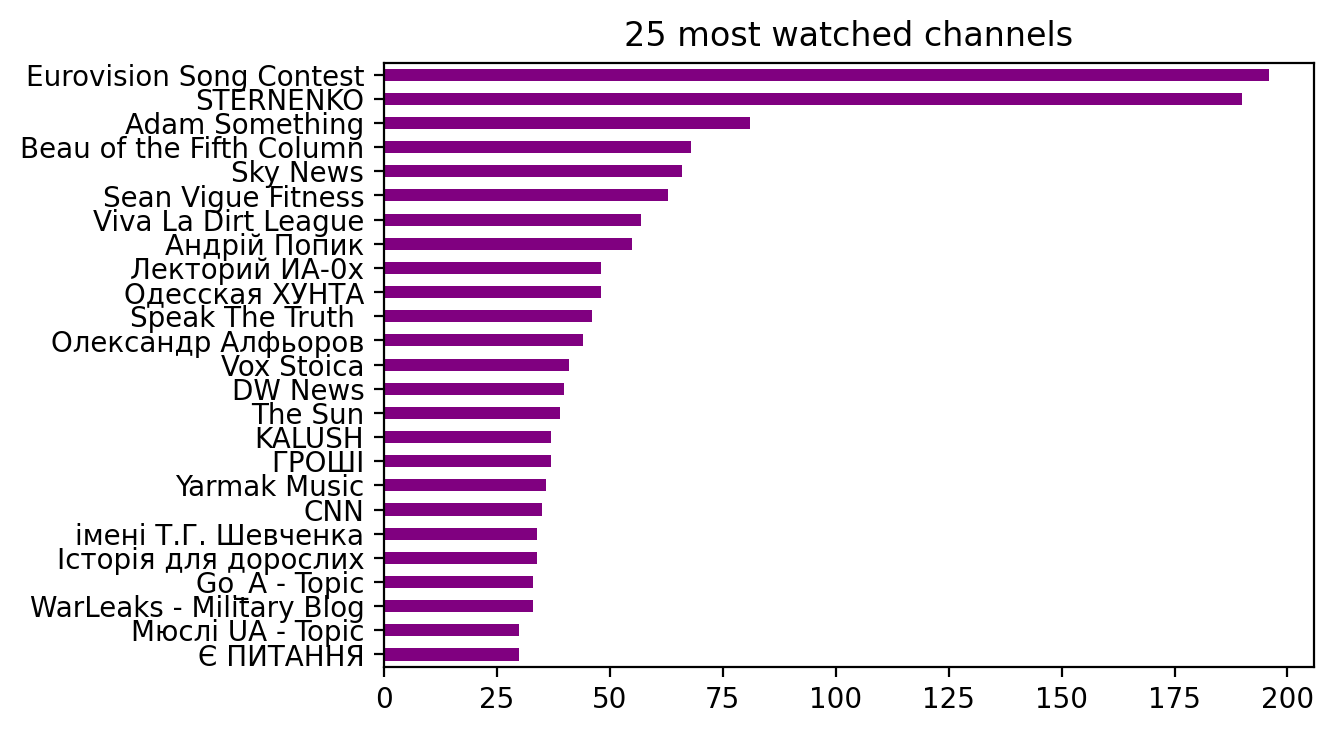

In [5]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()

### 2.3 Count on how many videos you clicked per hour

<AxesSubplot:>

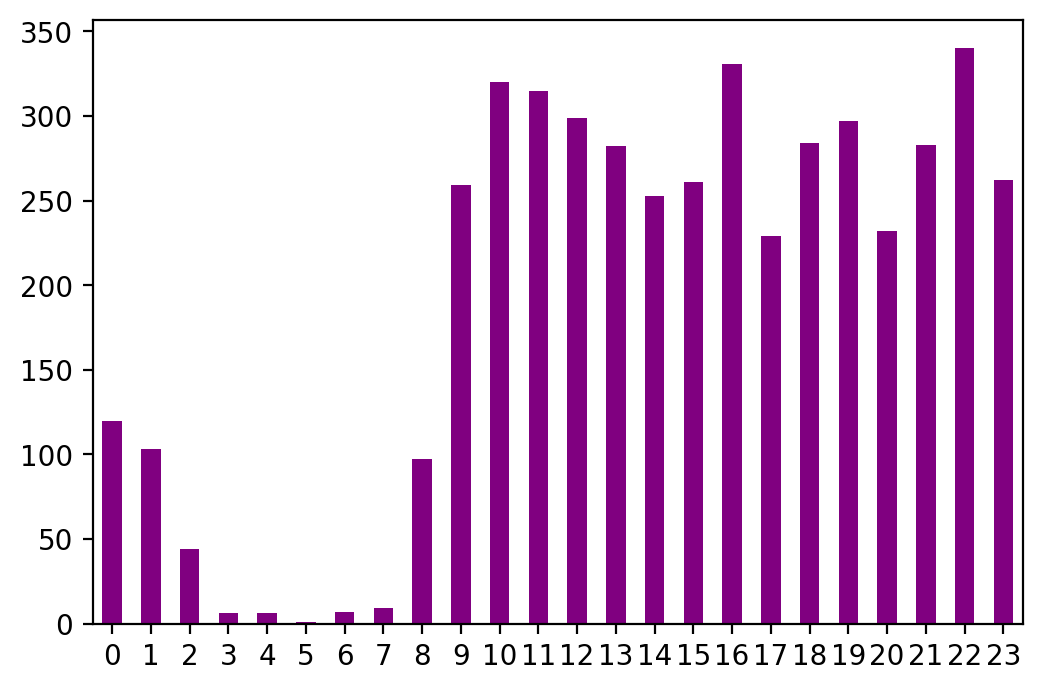

In [6]:
hours = pd.DatetimeIndex(df['time']).hour # get hours from datetime
hours = hours.value_counts().sort_index() # count on how many videos you clicked and sort hours from 0 to 23
hours.plot.bar(color="purple", rot=0)

### 2.4 Discover at what hours you watch a particular channel 

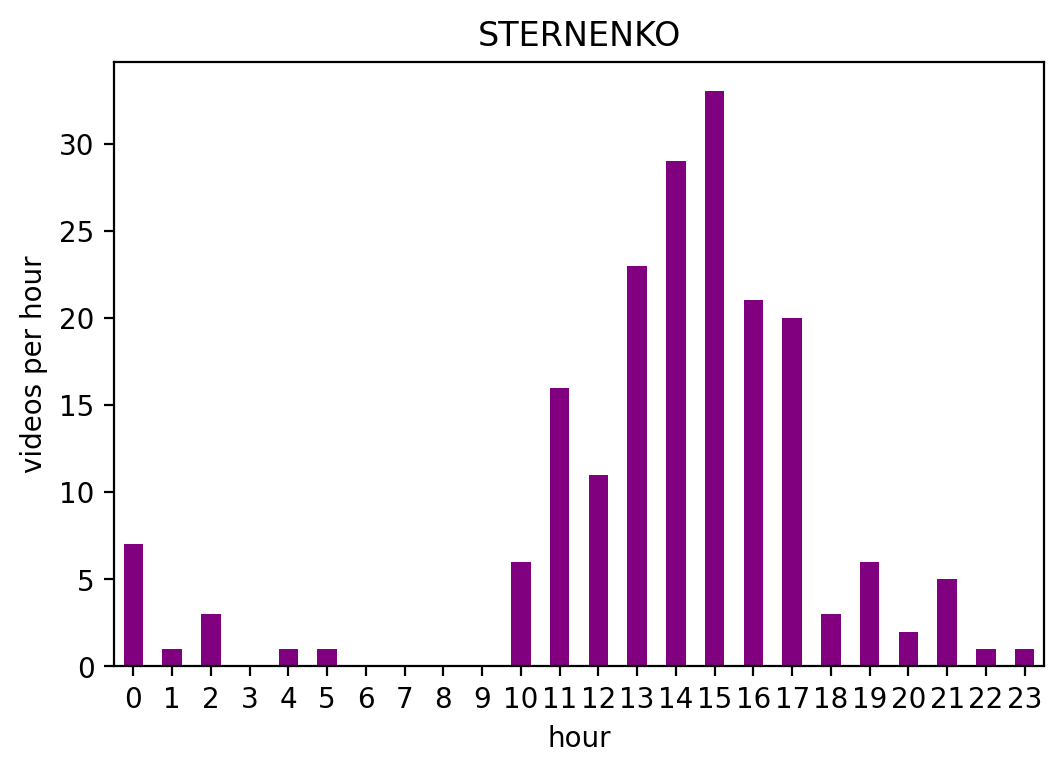

In [7]:
from plotting import one_channel_bar_plot_videos_per_h, get_videos_per_h_series

channel_name_to_look = "STERNENKO"
one_channel_bar_plot_videos_per_h(df, channel_name_to_look)


### 2.5 Plot videos count per hour for several channels

In [8]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

['Eurovision Song Contest',
 'STERNENKO',
 'Adam Something',
 'Beau of the Fifth Column',
 'Sky News',
 'Sean Vigue Fitness',
 'Viva La Dirt League',
 'Андрій Попик',
 'Лекторий ИА-0х',
 'Одесская ХУНТА',
 'Speak The Truth ',
 'Олександр Алфьоров',
 'Vox Stoica',
 'DW News',
 'The Sun',
 'KALUSH',
 'ГРОШІ',
 'Yarmak Music',
 'CNN',
 'імені Т.Г. Шевченка',
 'Історія для дорослих',
 'Go_A - Topic',
 'WarLeaks - Military Blog',
 'Мюслі UA - Topic',
 'Є ПИТАННЯ']

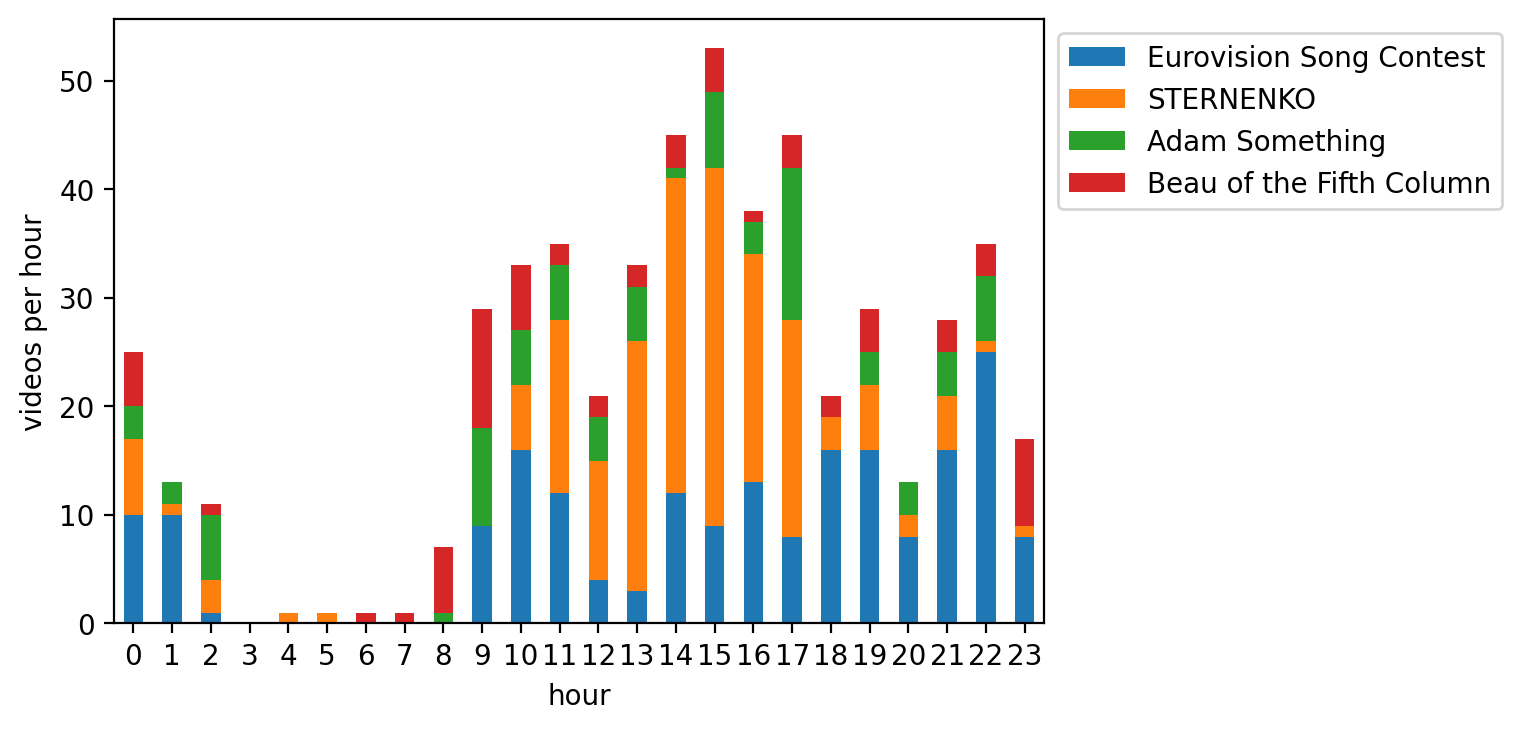

In [9]:
start_point = 0
interval = 4
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

### 2.6 Count how many videos you click per day of week

Mon    652
Tue    650
Wed    620
Thu    667
Fri    768
Sat    643
Sun    640
Name: weekday, dtype: int64

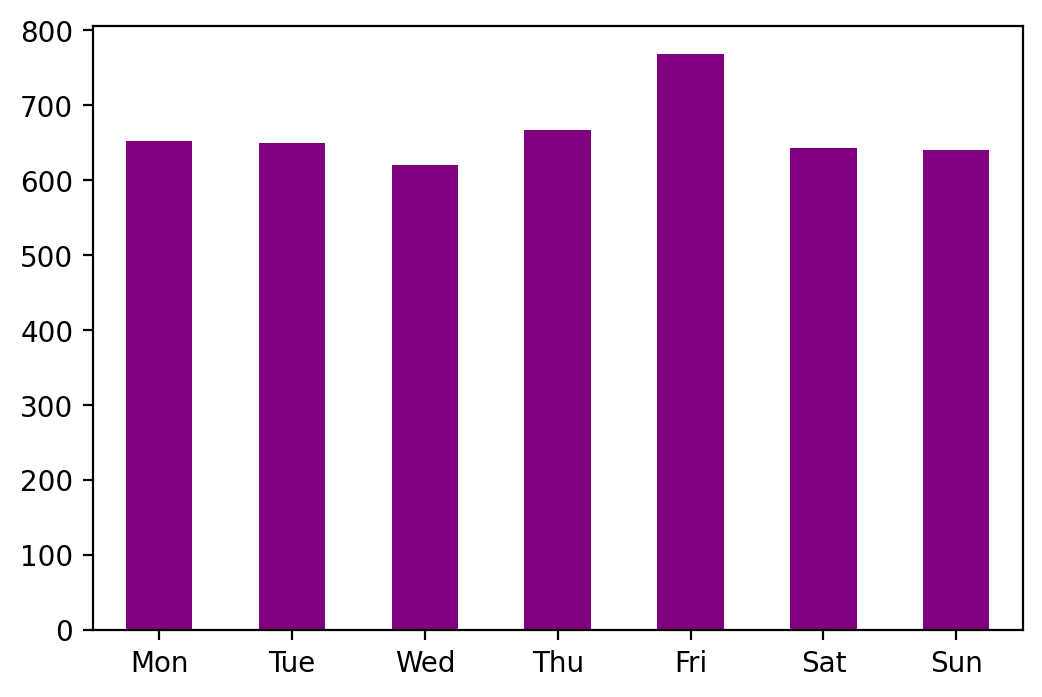

In [49]:
df['weekday'] = df['time'].dt.strftime('%a')
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df.head(20)
week_days = df["weekday"].value_counts()[str_week_days] # sort with custom index
week_days.plot.bar(color="purple", rot=0)
week_days